In [1]:
# use the scipy.linalg module, for solving linear systems of equations
# use the scipy.optimize module, for solving nonlinear equations

from scipy import linalg as la
from scipy import optimize

In [2]:
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# When solving a system of linear equations,it is important to look at the 
# condition number to estimate the accuracy of the solution.

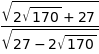

In [19]:
A = np.matrix([[2, 3], [5, 4]])

In [20]:
b = np.array([4, 3])

In [21]:
np.linalg.matrix_rank(A)

2

In [22]:
np.linalg.cond(A)

In [23]:
np.linalg.norm(A)

In [15]:
# direct approach to solve the linear problem is to compute the inverse of the matrix A and multiply it with the vector b

In [28]:
x = np.linalg.inv(A).dot(b)
x

matrix([[-1.,  2.]])

In [ ]:
# However, this is not the most efficient computational method to find the solution vector x.
# A better method is LU factorization of the matrix A 
# A = LU where L is a lower triangular matrix and U is an upper triangular matrix.
# Given L and U, the solution vector x can be efficiently constructed by 
# first solving Ly = b with forward substitution and 
# then solving Ux = y with backward substitution.
# Owning to the fact that L and U are triangular matrices, these two procedures are computationally efficient.

In [ ]:
# In SymPy we can perform a symbolic LU factorization by using the LUdecomposition method of the sympy.Matrix class.

In [29]:
A = sympy.Matrix([[2, 3], [5, 4]])

In [30]:
b = sympy.Matrix([4, 3])

In [31]:
A.rank()

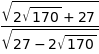

In [32]:
A.condition_number()

In [33]:
sympy.N(_)

In [34]:
A.norm()

In [37]:
L, U, _ = A.LUdecomposition()

In [39]:
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [40]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [41]:
L*U

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [42]:
A == L*U

True

In [44]:
x = A.solve(b)
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [46]:
x = A.LUsolve(b)
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [ ]:
# For numerical problems we can use the la.lu function form SciPy’s linear algebra module.
# It returns a permutation matrix P and the L and U matrices, such that A = PLU.
# Like with SymPy, we can solve the linear system Ax = b 
# without explicitly calculating the L and U matrices
# by using the la.solve function, which takes the A matrix and the b vector as arguments.
# This is in general the preferred method for solving numerical linear equation systems using SciPy.

In [48]:
A = np.matrix([[2, 3], [5, 4]])

In [49]:
b = np.array([4, 3])

In [50]:
P, L, U = la.lu(A)

In [51]:
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [52]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [53]:
P

array([[0., 1.],
       [1., 0.]])

In [54]:
P.dot(L.dot(U))

array([[2., 3.],
       [5., 4.]])

In [55]:
A == P.dot(L.dot(U))

matrix([[ True,  True],
        [ True,  True]])

In [57]:
x = la.solve(A, b)
x

array([-1.,  2.])

In [59]:
p = sympy.symbols("p", positive=True)

In [60]:
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])

In [61]:
b = sympy.Matrix([1, 2])

In [62]:
x = A.solve(b)
x

⎡        1 ⎤
⎢-2⋅√p + ──⎥
⎢        √p⎥
⎢──────────⎥
⎢       1  ⎥
⎢ -√p + ── ⎥
⎢       √p ⎥
⎢          ⎥
⎢    1     ⎥
⎢ ──────── ⎥
⎢       1  ⎥
⎢ -√p + ── ⎥
⎣       √p ⎦

In [63]:
# condition number in the numerical case

In [80]:
# Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

# Solve symbolically
x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify()

p_vec = np.linspace(0.9, 1.1, 200)
for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])

Text(0.5, 0, '$p$')

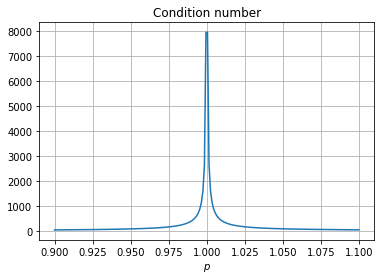

In [81]:
condA_vec= [Acond.subs(p, pp).evalf() for pp in p_vec]

# Plot symbolic solution
plt.plot(p_vec, condA_vec)
plt.title(label="Condition number")
plt.grid()
plt.xlabel(r'$p$')

In [82]:
# Numerical problem specification
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])

# Solve numerically
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)
p_vec = np.linspace(0.9, 1.1, 200)

for n in range(2):
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])

Text(0.5, 1.0, 'Error in solution\n(numerical - symbolic)/symbolic')

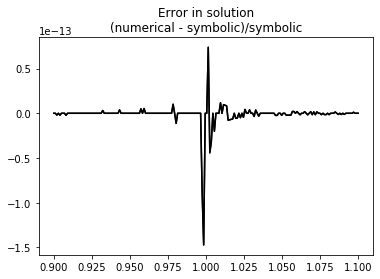

In [84]:
for n in range(2):
    plt.plot(p_vec, (x_num - x_sym)/x_sym, 'k')
    plt.grid()
plt.title(label="Error in solution\n(numerical - symbolic)/symbolic")

In [ ]:
#   x1 + 2*x2 + 3*x3 = 7
# 4*x1 + 5*x2 + 6*x3 = 8
# -----------------------

In [85]:
x_vars = sympy.symbols("x_1, x_2, x_3")

In [86]:
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])

In [87]:
x = sympy.Matrix(x_vars)

In [88]:
b = sympy.Matrix([7, 8])

In [89]:
sympy.solve(A*x - b, x_vars)

In [ ]:
a11=p+1
a12=1/p
a21=p^2-1
a22=abs(p)

In [4]:
import sympy as sp
sp.init_printing()

In [5]:
p = sp.symbols("p", real=True)

In [9]:
A = sp.Matrix([[p+1, 1/p], [p**2-1, sp.Abs(p)]])
A

⎡         1 ⎤
⎢p + 1    ─ ⎥
⎢         p ⎥
⎢           ⎥
⎢ 2         ⎥
⎣p  - 1  │p│⎦

In [15]:
b = sp.Array([1, 1])
b

[1  1]

In [17]:
x = A.solve([1, 1])
x

AttributeError: 'list' object has no attribute 'rows'